In [13]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

In [14]:
def plot_series(data, x_lab, y_lab, title, file_name, loc, scatter=False, grid=False):
  fig = matplotlib.pyplot.gcf()
  fig.set_size_inches(18.5, 8, forward=True)

  for d in data:
    if scatter:
      plt.scatter(d[0], d[1], alpha=0.8, label=d[2])
    else:
      plt.plot(d[0], d[1], alpha=0.8, label=d[2])

  plt.xlabel(x_lab)
  plt.ylabel(y_lab)
  plt.title(title)
  plt.legend(loc=loc, prop={'size': 16})
  if grid:
    # plt.grid(axis='x', color='0.95')
    # plt.grid(axis='x', which='major', color='k', linestyle='-')
    plt.grid(axis='x', which='major', color='r', linestyle='-', alpha=0.2)
    plt.grid(axis='x', which='minor', color='r', linestyle='-', alpha=0.2)
    plt.minorticks_on()

  plt.savefig(f'./visualization/craig_unstable/{file_name}.pdf', dpi=300, transparent=True)
  plt.show()

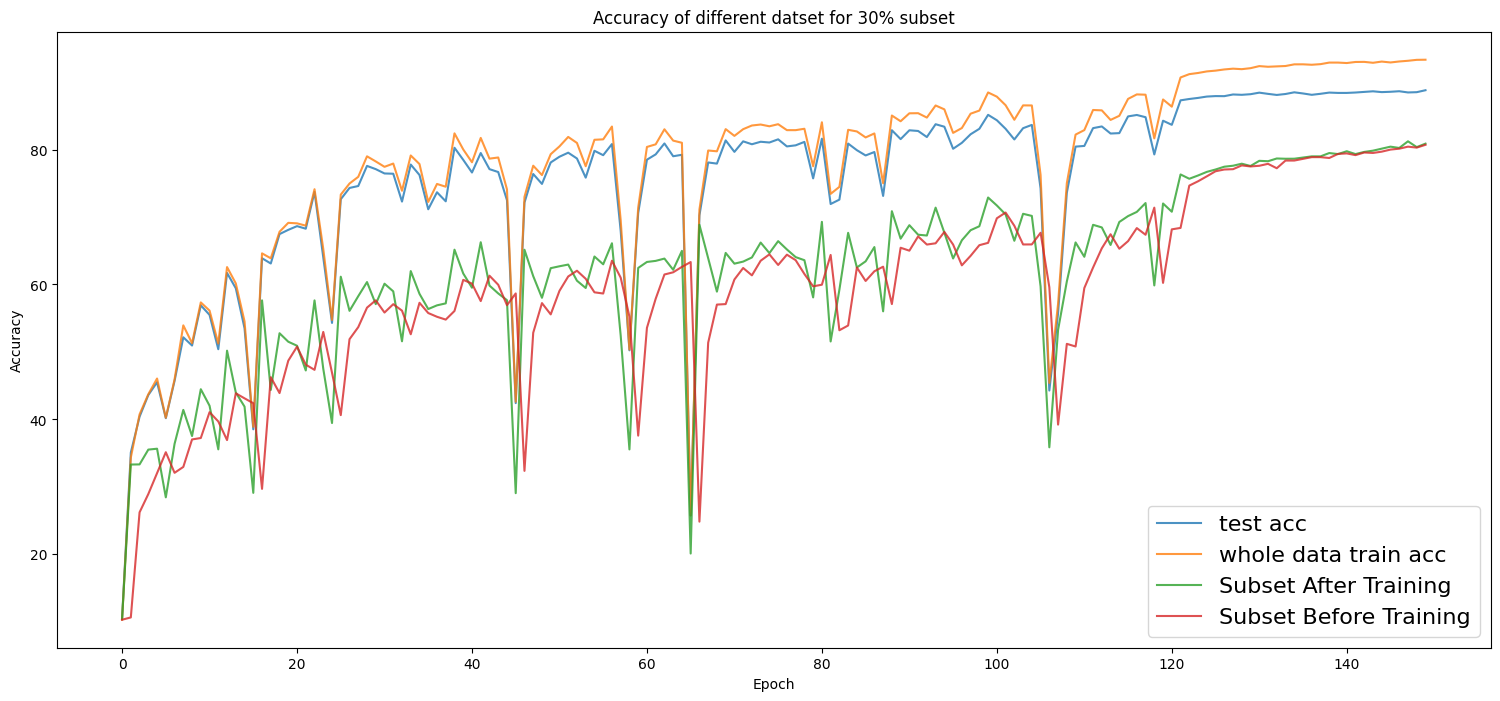

In [24]:
base_dir = "./tmp/c10_drop_check/"
# c10_drop_check-0-0.3-0_grd_w_warm_mile_start_0_lag_1_b256_0_False_rp0_el0.npz
subsets = [0.3, 0.5, 0.7]
ss = 0.3
c10_30b = np.load(base_dir + "c10_drop_check-0-0.3-0_grd_w_warm_mile_start_0_lag_1_b256_0_False_rp0_el0.npz")

max_epoch = 150

test_acc = c10_30b['test_acc'][0][:max_epoch]
train_acc = c10_30b['train_acc'][0][:max_epoch]
train_acc_subset_after = c10_30b['after_tra_ss_prec1_list'][:max_epoch]
train_acc_subset_before = c10_30b['before_tra_ss_prec1_list'][:max_epoch]
epoch = [x for x in range(150)]


series_list = [
    (epoch, test_acc, "test acc"),
    (epoch, train_acc, "whole data train acc"),
    (epoch, train_acc_subset_after, "Subset After Training"),
    (epoch, train_acc_subset_before, "Subset Before Training")
]

plot_series(data=series_list, x_lab="Epoch", y_lab="Accuracy",
            title=f"Accuracy of different datset for {int(ss*100)}% subset", file_name=f"drop_check_{ss}", 
            loc="lower right")

In [21]:
[x for x in c10_30b]

['train_loss',
 'test_acc',
 'train_acc',
 'test_loss',
 'data_time',
 'train_time',
 'grd_time',
 'sim_time',
 'best_g',
 'best_b',
 'not_selected',
 'times_selected',
 'subset',
 'weight',
 'before_tra_ss_prec1_list',
 'before_tra_ss_loss_list',
 'after_tra_ss_prec1_list',
 'after_tra_ss_loss_list']

In [28]:
df = pd.DataFrame({
    "before": train_acc_subset_before,
    "after": train_acc_subset_after,
    "after whole_data": test_acc,
    "test_acc": test_acc
    
})

df.head(50)

,before,after,after whole_data,test_acc
0,10.300000,10.386667,10.49,10.49
1,10.640000,33.306667,35.09,35.09
2,26.220000,33.326667,40.40,40.40
3,28.933333,35.520000,43.61,43.61
4,32.046667,35.653333,45.50,45.50
5,35.133333,28.440000,40.18,40.18
6,32.080000,36.366667,45.70,45.70
7,32.953333,41.406667,52.17,52.17
8,37.026667,37.533333,50.95,50.95
9,37.240000,44.473333,56.91,56.91
